MainProcess


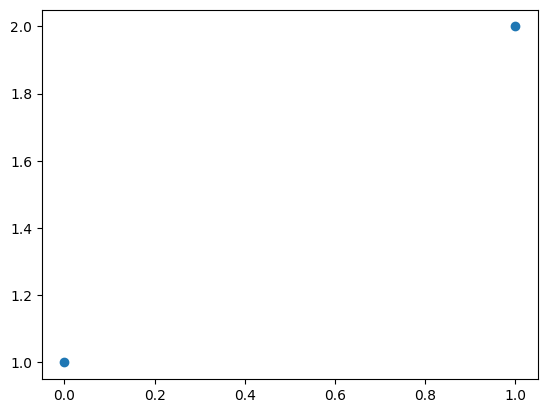

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_0M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [3]:
todo = slice(None)
data = copy.deepcopy(models[0].inferred_test_data[todo])
train_data = fls.load_all_train_data()+fls.load_all_extra_data()
train_data_new = []
for t in models[0].train_data:
    for d in train_data:
        if t.name == d.name:
            train_data_new.append(d)
models[0].train_data = train_data_new  
#print([t.name for t in models[0].test_data])
test_data_new = []
for t in models[0].test_data:
    for d in train_data:
        if t.name == d.name:
            test_data_new.append(d)
models[0].test_data = test_data_new  
#print([t.name for t in models[0].test_data])
#print([t.name for t in fls.dill_load(fls.temp_dir + 'data_' + str(0) + '.pickle')])

In [4]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [5]:
import contextlib
import io
def f(m):
    with contextlib.redirect_stdout(io.StringIO()) as f:
        fls.list_attrs(m.step1Labels)
    return f.getvalue()
model = copy.deepcopy(models[0].untrained_model)
# model.step1Labels.preprocessor = flg_preprocess.Preprocessor2()
# model.step1Labels.preprocessor.target_voxel_spacing = 20.
# model.step1Labels.box_size = 18
# model.step1Labels.prevent_ultralytics_resize = True     
# model.step1Labels.negative_label_threshold = 0.6
# model.step1Labels.negative_slice_ratio = 0.  
model2 = flg_model.ThreeStepModelLabelBased()
model2.seed = 0
model2.preprocessor = model.preprocessor
print(f(model))
print(f(model2))
f(model)==f(model2)

alternative_slice_selection = True
auto_augment = None
box = 7.5
box_size = 24
close_mosaic = 10
concentration = 1
confidence_threshold = 0.0
copy_paste = 0.0
cos_lr = True
crop_fraction = 1.0
degrees = 0.0
dropout = 0.0
erasing = 0.4
final_relative_confidence_threshold = True
fix_norm_bug = True
fliplr = 0.5
flipud = 0.0
forbidden_range = 20
hsv_h = 0.015
hsv_s = 0.7
hsv_v = 0.4
img_size = 640
lr0 = 0.001
lrf = 0.01
mixup = 0.2
model_name = yolov9s
momentum = 0.937
mosaic = 1.0
multi_scale_training = False
n_ensemble = 1
n_epochs = 50
negative_label_threshold = 0.6
negative_slice_ratio = 0.1
patience = 10
perspective = 0.0
preprocessor = Preprocessor()
prevent_ultralytics_resize = True
relative_confidence_threshold = 0.2
remove_suspect_areas = False
scale = 0.5
seed = None
shear = 0.0
train_results = 0
trained_model = 0
translate = 0.1
trust = 4
trust_expanded = 6
trust_neg = 4
use_albumentations = False
use_best_epoch = True
use_pretrained_weights = True
weight_decay = 0.0005

altern

False

In [6]:
fls.list_attrs(models[0].untrained_model.train_data_selector)

datasets = ['tom']
include_multi_motor = True


In [7]:
flg_model.ThreeStepModelLabelBased().step1Labels

YOLOModel(preprocessor=Preprocessor2())

In [8]:
import flg_yolo2
flg_yolo2.YOLOModel()

YOLOModel(preprocessor=Preprocessor2())

In [9]:
highest_false_score = []
real_score = []
data_list = []
for i_type in range(4):
    model = copy.deepcopy(models[0].untrained_model)    
    #model.step1Labels.n_epochs = 2
    #m.step2Motors.distance_threshold = 10.
    if i_type == 0:
        # baseline
        pass
    elif i_type==1:
        # blur
        model.step1Labels.preprocessor = flg_preprocess.Preprocessor2()
    elif i_type==2:
        # no resize
        model.step1Labels.preprocessor = flg_preprocess.Preprocessor2()
        model.step1Labels.preprocessor.target_voxel_spacing = 20.
        model.step1Labels.box_size = 18
        model.step1Labels.prevent_ultralytics_resize = True        
    elif i_type>=3 and i_type<=4:
        # negative labels
        model.step1Labels.preprocessor = flg_preprocess.Preprocessor2()
        model.step1Labels.preprocessor.target_voxel_spacing = 20.
        model.step1Labels.box_size = 18
        model.step1Labels.prevent_ultralytics_resize = True     
        model.step1Labels.negative_label_threshold = 0.6
        model.step1Labels.negative_slice_ratio = 0.     
        model.seed = i_type-3
    elif i_type>=5:
        model = flg_model.ThreeStepModelLabelBased()   
        model.seed = i_type-5
    model.step1Labels.relative_confidence_threshold = 0.01
    model.run_in_parallel = False   
    model_file = fls.temp_dir + 'model_' + str(i_type) + '.pickle'
    if not os.path.isfile(model_file):
        model.train(models[0].train_data, models[0].test_data)
        fls.dill_save(model_file, model)
    model = fls.dill_load(model_file)
    #model = fls.dill_load(fls.temp_dir + 'model_' + str(i_type) + '.pickle')
    data_file = fls.temp_dir + 'data_' + str(i_type) + '.pickle'
    if not os.path.isfile(data_file):        
        inferred_data = model.infer(models[0].test_data[todo])
        fls.dill_save(data_file, inferred_data)
    inferred_data = fls.dill_load(data_file)    
    for d in inferred_data:
        d.labels_unfiltered = d.labels_unfiltered2
    fls.mark_tf_pn(inferred_data, models[0].test_data[todo])
    data_list.append(inferred_data)
    this_highest_false_score = []
    this_real_score = []
    for i,r in zip(inferred_data, models[0].test_data[todo]):
        if not 'tom' in i.name:
            continue
        false_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==1.]
        if len(false_positives)>0:
            this_highest_false_score.append(np.max(false_positives['confidence']))
        else:
            this_highest_false_score.append(0)
        if len(r.labels)>0:
            true_positives = i.labels_unfiltered[i.labels_unfiltered['tf_pn']==0.]
            if len(true_positives)>0:
                this_real_score.append(np.max(true_positives['confidence']))
            else:
                this_real_score.append(0)
    highest_false_score.append(this_highest_false_score)
    real_score.append(this_real_score)


In [10]:
for d in data_list:
    n_corr=0
    n_total=0
    for i,r in zip(d, models[0].test_data[todo]):
        if len(r.labels)>0:# and 'tom' in r.name:
            n_total+=1
            ind = np.argmax(i.labels_unfiltered['confidence'])
            if (i.labels_unfiltered['tf_pn'].tolist()[ind])==0.:
                n_corr += 1
    print(n_corr/n_total)
    #print(i.labels_unfiltered)

0.705
0.765
0.95
0.94


In [11]:
i_baseline = 2; i_new = 3;

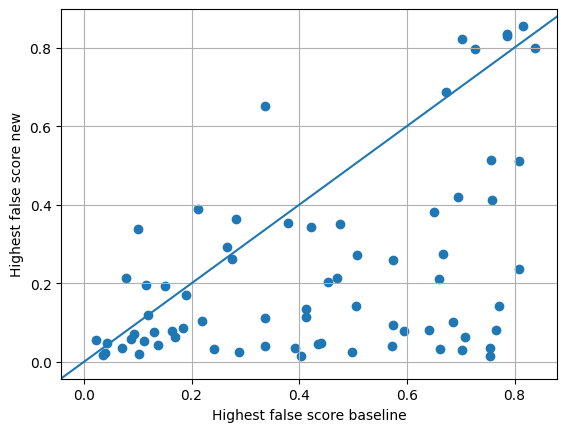

In [12]:
plt.scatter(highest_false_score[i_baseline], highest_false_score[i_new])
plt.xlabel('Highest false score baseline')
plt.ylabel('Highest false score new')
plt.grid(True)
plt.axline((0,0),slope=1)

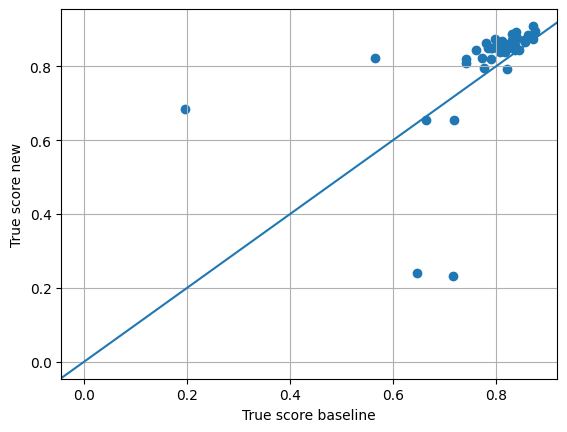

In [13]:
plt.scatter(real_score[i_baseline], real_score[i_new])
plt.xlabel('True score baseline')
plt.ylabel('True score new')
plt.grid(True)
plt.axline((0,0),slope=1)

In [14]:
xx=(np.argwhere(np.logical_and(np.array(real_score[i_baseline])>0., np.array(real_score[i_new])<0.4))).flatten()
xx

array([27, 39])

In [15]:
#cur_id = 87
cur_id = 0
for ii in range(len(models[0].test_data[todo])):
    if len(models[0].test_data[todo][ii].labels)>0:     
        if cur_id in xx:
            print(models[0].test_data[todo][ii].name,ii,real_score[i_baseline][cur_id],real_score[i_new][cur_id])
        cur_id+=1

aba2015-07-15-59 57 0.64599609375 0.241455078125
mba2012-04-23-13 69 0.716796875 0.2330322265625


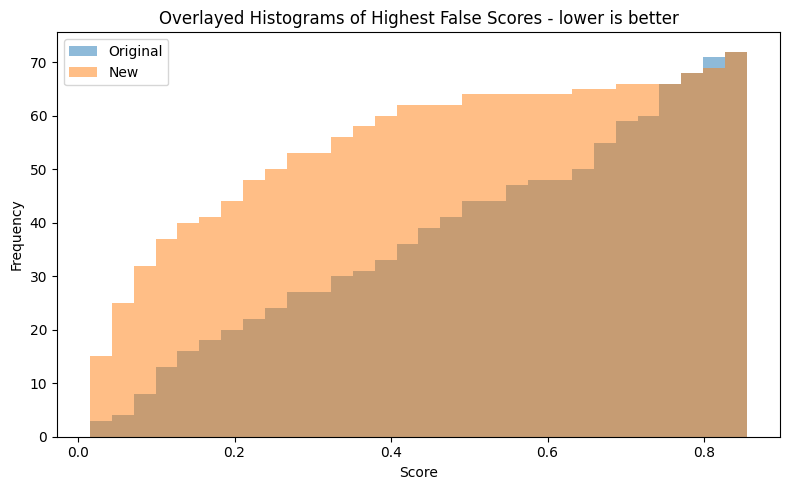

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([highest_false_score[i_baseline], highest_false_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(highest_false_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(highest_false_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of Highest False Scores - lower is better')
plt.legend()
plt.tight_layout()
plt.show()

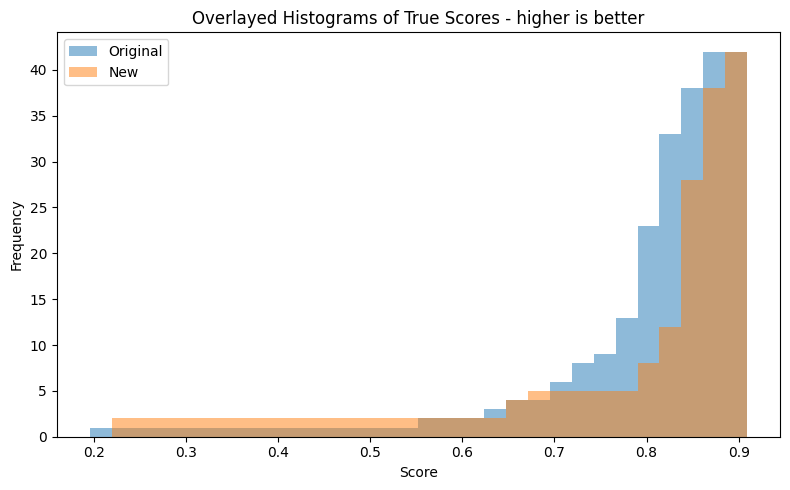

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# flatten the two arrays into one to get global bin edges
all_scores = np.concatenate([real_score[i_baseline], real_score[i_new]])
# choose number of bins (e.g. 30) or compute automatically
bins = np.histogram_bin_edges(all_scores, bins=30)

plt.figure(figsize=(8, 5))
plt.hist(real_score[i_baseline], bins=bins, cumulative=True, alpha=0.5, label='Original')
plt.hist(real_score[i_new], bins=bins, cumulative=True, alpha=0.5, label='New')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of True Scores - higher is better')
plt.legend()
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


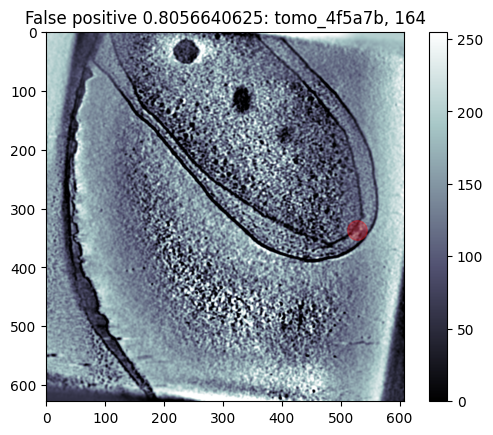

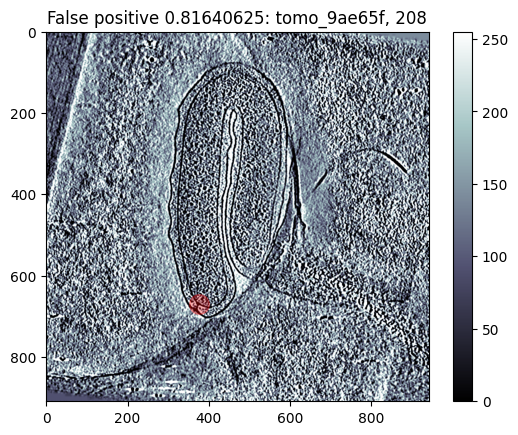

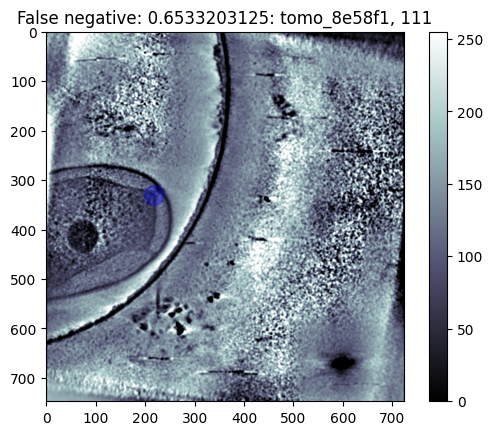

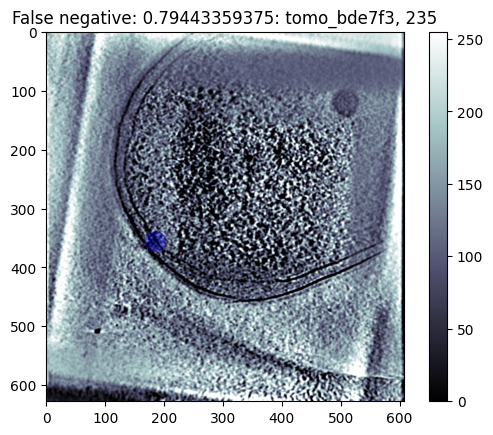

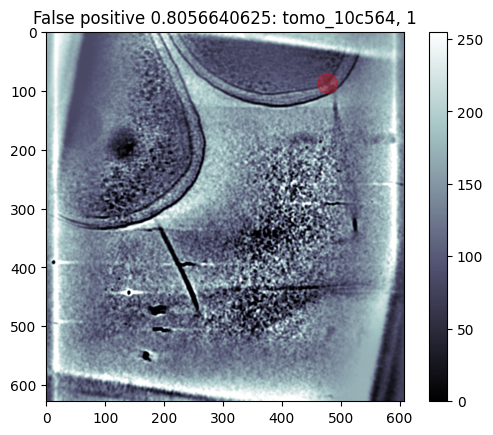

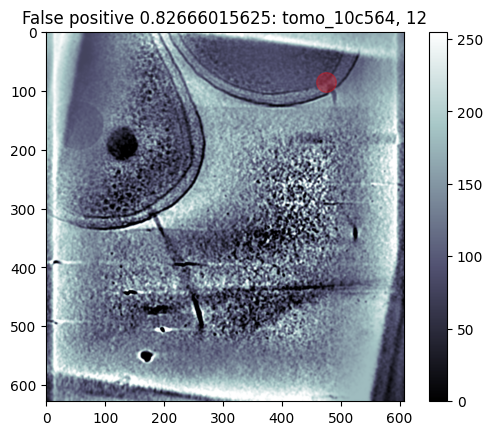

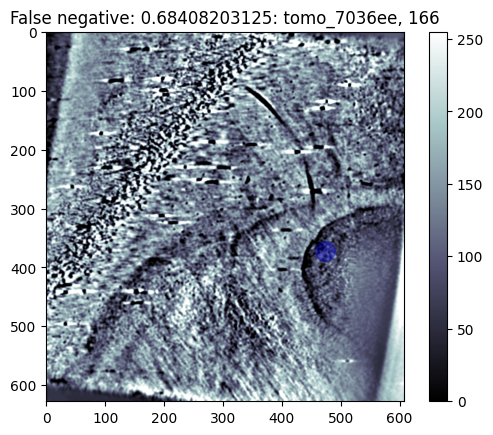

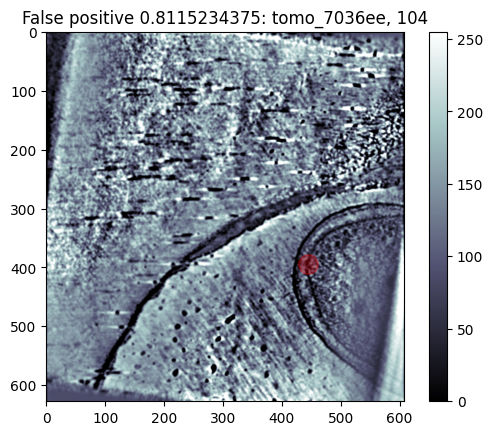

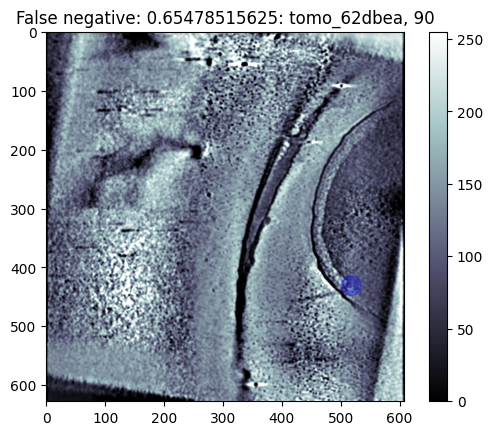

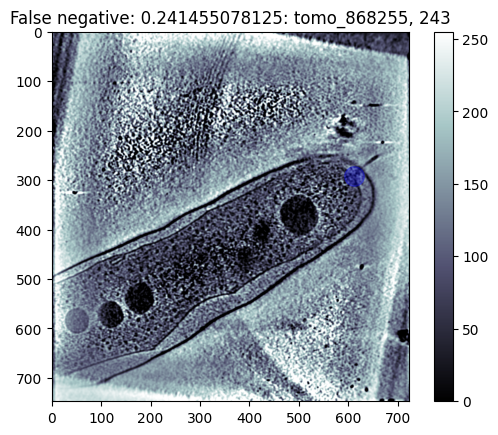

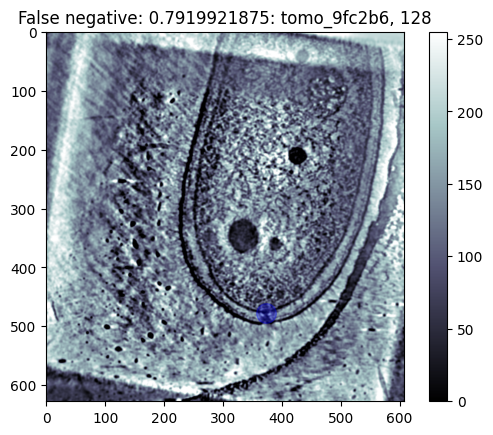

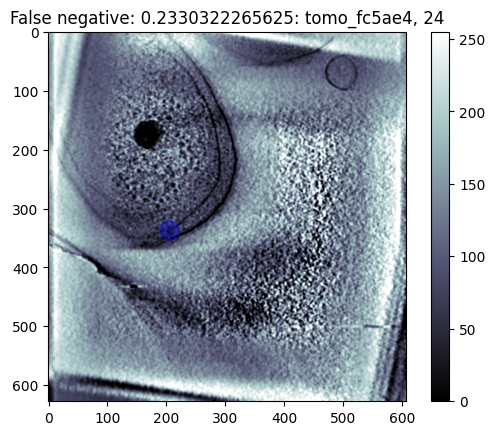

In [18]:
def visualize_fp_fn(data, threshold_fp, threshold_fn):

    all_data = fls.load_all_train_data() + fls.load_all_extra_data()
    def visualize_slice(name, z,y,x, color, title_str):
        for d in all_data:
            if d.name == name:
                break
        else:
            raise 'Not found'
        d = copy.deepcopy(d)
        prep = flg_preprocess.Preprocessor2()
        prep.load_and_preprocess(d, desired_original_slices = [z])

        plt.figure()
        plt.imshow(d.data[0,:,:], cmap='bone')
        plt.colorbar()
        plt.title(title_str + ': ' + name + ', ' + str(z))

        plt.scatter([x*d.resize_factor], [y*d.resize_factor], alpha=0.3, color=color, s=200)
    
    for d in data:  
        if not 'tom' in d.name:
            continue
        lab = copy.deepcopy(d.labels_unfiltered).reset_index()

        # false negatives
        if not np.any(np.logical_and(lab['tf_pn']==0., lab['confidence']>threshold_fn)):
            for r in all_data:
                if r.name == d.name:
                    break
            else:
                raise 'Not found'
            if len(r.labels)>0:
                attempts = lab[lab['tf_pn']==0.]
                if len(attempts)>0:
                    thresh = np.max(attempts['confidence'])
                else:
                    thresh = 0.
                visualize_slice(d.name, np.round(r.labels['z'][0]).astype(int),r.labels['y'][0],r.labels['x'][0], 'blue', 'False negative: '+str(thresh))

        # false positives
        slices_done = []
        for i_row in range(len(lab)):
            if lab['tf_pn'][i_row]==1. and lab['confidence'][i_row]>threshold_fp and lab['z'][i_row] not in slices_done:
                #print('fp', d.name, lab['z'][i_row], lab['confidence'][i_row])
                visualize_slice(d.name, lab['z'][i_row],lab['y'][i_row],lab['x'][i_row], 'red', 'False positive ' + str(lab['confidence'][i_row]))
                for ii in np.arange(lab['z'][i_row]-10, lab['z'][i_row]+11):
                    slices_done.append(ii)
visualize_fp_fn(data_list[i_new], 0.8, 0.8)